In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import init_notebook_mode


In [25]:
# Initialize Cufflinks and Plotly
cf.go_offline()
init_notebook_mode(connected=True)

# Step 1: Loading the Dataset

In [26]:
df = pd.read_csv('Drug_clean.csv')

df.head()

Condition                         Drug  EaseOfUse  \
0  Acute Bacterial Sinusitis                  Amoxicillin   3.852353   
1  Acute Bacterial Sinusitis  Amoxicillin-Pot Clavulanate   3.470000   
2  Acute Bacterial Sinusitis  Amoxicillin-Pot Clavulanate   3.121429   
3  Acute Bacterial Sinusitis                   Ampicillin   2.000000   
4  Acute Bacterial Sinusitis                   Ampicillin   3.250000   

   Effective            Form Indication       Price     Reviews  Satisfaction  \
0   3.655882         Capsule   On Label   12.590000   86.294118      3.197647   
1   3.290000  Liquid (Drink)  Off Label  287.370000   43.000000      2.590000   
2   2.962857          Tablet   On Label   70.608571  267.285714      2.248571   
3   3.000000         Capsule   On Label   12.590000    1.000000      1.000000   
4   3.000000          Tablet   On Label  125.240000   15.000000      3.000000   

  Type  
0   RX  
1   RX  
2   RX  
3   RX  
4   RX

# Step 2: Data Cleaning

### Handeling Missing Values

In [27]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Define methods for handling missing values
fill_methods = {
    'EaseOfUse': 'mean',
    'Effective': 'mean',
    'Price': 'mean',
    'Reviews': 'mean',
    'Satisfaction': 'mean',
    'Condition': 'mode',
    'Drug': 'mode',
    'Form': 'mode',
    'Indication': 'mode',
    'Type': 'mode'
}

# Apply the appropriate method dynamically
for col, method in fill_methods.items():
    if method == 'mean':
        df[col].fillna(df[col].mean(), inplace=True)
    elif method == 'mode':
        df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled dynamically. Data is clean.")


Missing values:
 Condition       0
Drug            0
EaseOfUse       0
Effective       0
Form            0
Indication      0
Price           0
Reviews         0
Satisfaction    0
Type            0
dtype: int64
Missing values handled dynamically. Data is clean.


C:\Users\asus\AppData\Local\Temp\ipykernel_18948\2109460954.py:21: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\asus\AppData\Local\Temp\ipykernel_18948\2109460954.py:23: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

### Checking for Duplicates

In [28]:
# Check for duplicates
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

# Remove duplicates if any and reset index
df = df.drop_duplicates().reset_index(drop=True)
print("Duplicates removed. Data is now clean.")

# Preview cleaned data
print(df.head())


Number of duplicate rows: 0
Duplicates removed. Data is now clean.
                   Condition                         Drug  EaseOfUse  \
0  Acute Bacterial Sinusitis                  Amoxicillin   3.852353   
1  Acute Bacterial Sinusitis  Amoxicillin-Pot Clavulanate   3.470000   
2  Acute Bacterial Sinusitis  Amoxicillin-Pot Clavulanate   3.121429   
3  Acute Bacterial Sinusitis                   Ampicillin   2.000000   
4  Acute Bacterial Sinusitis                   Ampicillin   3.250000   

   Effective            Form Indication       Price     Reviews  Satisfaction  \
0   3.655882         Capsule   On Label   12.590000   86.294118      3.197647   
1   3.290000  Liquid (Drink)  Off Label  287.370000   43.000000      2.590000   
2   2.962857          Tablet   On Label   70.608571  267.285714      2.248571   
3   3.000000         Capsule   On Label   12.590000    1.000000      1.000000   
4   3.000000          Tablet   On Label  125.240000   15.000000      3.000000   

  Type  
0   

# Step 3: Convert Data Types

In [29]:
# Convert numerical columns to float (if not already)
num_cols = ['EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction']
df[num_cols] = df[num_cols].astype('float64')

# Convert categorical columns to category type
cat_cols = ['Condition', 'Drug', 'Form', 'Indication', 'Type']
df[cat_cols] = df[cat_cols].astype('category')

print("Data types converted successfully.")
print(df.info())

Data types converted successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Condition     685 non-null    category
 1   Drug          685 non-null    category
 2   EaseOfUse     685 non-null    float64 
 3   Effective     685 non-null    float64 
 4   Form          685 non-null    category
 5   Indication    685 non-null    category
 6   Price         685 non-null    float64 
 7   Reviews       685 non-null    float64 
 8   Satisfaction  685 non-null    float64 
 9   Type          685 non-null    category
dtypes: category(5), float64(5)
memory usage: 52.6 KB
None


# Step 4: Data Transformation

In [30]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Initialize transformers
scaler = MinMaxScaler()
encoder = LabelEncoder()

# Normalize numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode categorical columns
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
    

print("Data transformation completed.")
print(df.head())


Data transformation completed.
   Condition  Drug  EaseOfUse  Effective  Form  Indication     Price  \
0          0    41   0.713088   0.663971     0           2  0.000829   
1          0    42   0.617500   0.572500     2           1  0.027357   
2          0    42   0.530357   0.490714     5           2  0.006431   
3          0    43   0.250000   0.500000     0           2  0.000829   
4          0    43   0.562500   0.500000     5           2  0.011705   

    Reviews  Satisfaction  Type  
0  0.018359      0.549412     2  
1  0.009040      0.397500     2  
2  0.057315      0.312143     2  
3  0.000000      0.000000     2  
4  0.003013      0.500000     2  


In [31]:
# Example of Min-Max scaling inverse
original_min = 0  # Replace with the original minimum
original_max = 300  # Replace with the original maximum
df['Price'] = df['Price'] * (original_max - original_min) + original_min


## Univariate Analysis

##### Plotting histograms for key numerical features

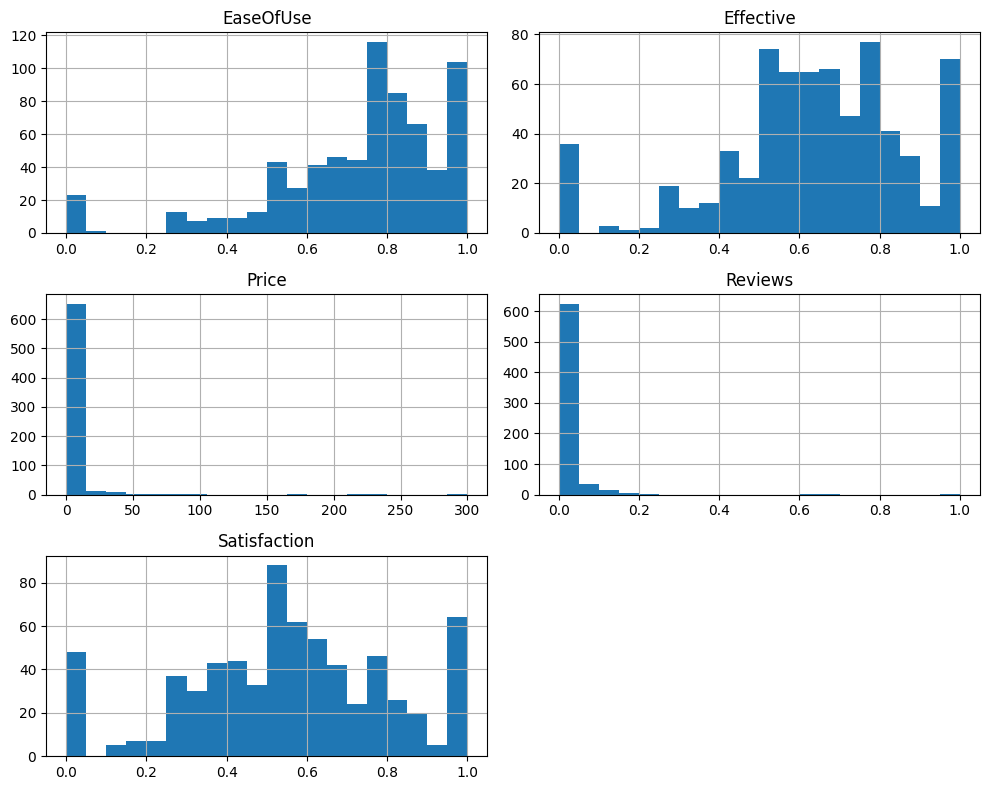

In [32]:
df[num_cols].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

##### Detecting outliers in 'Price'

In [33]:
import plotly.express as px

fig = px.histogram(df, x='Price', nbins=20, title='Price Distribution (Histogram)', 
                   labels={'Price': 'Price (₹)'}, marginal='box')
fig.show()



##### Distribution plot for 'Satisfaction'

In [34]:
# Plotly KDE (Kernel Density Estimate) plot for 'Satisfaction'

# Create KDE plot for 'Satisfaction'
fig = px.density_contour(df, x='Satisfaction', title='Satisfaction Distribution (KDE Plot)', 
                         labels={'Satisfaction': 'Satisfaction Level'})  # Change label here
fig.update_traces(contours_coloring="fill", contours_showlabels=True)

# Update axis labels (if necessary)
fig.update_layout(xaxis_title="Satisfaction Score", yaxis_title="Density")

fig.show()


##### Proportion of Conditions in the Dataset

In [35]:
import plotly.express as px

# Create a Plotly pie chart for the 'Condition' column
fig = px.pie(df, names='Condition', title='Condition Distribution')

# Show the plot
fig.show()


What Does the Pie Chart Show for Condition?
1. Slices: Each slice of the pie represents one of the unique Condition categories (e.g., "Acute Bacterial Sinusitis", "Atopic Dermatitis").
2. Size of Slices: The size of each slice corresponds to the proportion of each condition in the dataset. Larger slices represent conditions that are more frequent, and smaller slices represent those that are less frequent.
3. Labels/Percentages: The chart will typically include labels or percentages that show how much each condition contributes to the total dataset.

Insights
1. You can quickly identify which conditions are most prevalent and which are less common in your data.
2. It helps in understanding the distribution of the conditions at a glance, making it easier to identify imbalances or trends in the dataset.

#### Categorical Feature Distribution using Donut Charts

In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot grid
fig = make_subplots(
    rows=1, cols=3,  # 1 row, 3 columns
    subplot_titles=('Form Distribution', 'Indication Distribution', 'Type Distribution'),
    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]]  # Use pie charts for each
)

# Donut chart for 'Form' column
form_counts = df['Form'].value_counts()
form_pie = go.Pie(labels=form_counts.index, values=form_counts.values, hole=0.4, name='Form')
fig.add_trace(form_pie, row=1, col=1)

# Donut chart for 'Indication' column
indication_counts = df['Indication'].value_counts()
indication_pie = go.Pie(labels=indication_counts.index, values=indication_counts.values, hole=0.4, name='Indication')
fig.add_trace(indication_pie, row=1, col=2)

# Donut chart for 'Type' column
type_counts = df['Type'].value_counts()
type_pie = go.Pie(labels=type_counts.index, values=type_counts.values, hole=0.4, name='Type')
fig.add_trace(type_pie, row=1, col=3)

# Update layout
fig.update_layout(
    title_text="Categorical Feature Distributions",
    showlegend=True,
    height=600,  # Adjusting figure size
    title_x=0.5  # Centering the title
)

# Show the plot
fig.show()


# Bivariate Analysis

##### Scatter Plot for Price vs. Satisfaction

In [37]:

fig = px.scatter(df, x='Price', y='Satisfaction', title='Price vs Satisfaction',
                 labels={'Price': 'Price', 'Satisfaction': 'Satisfaction'})

# Show the plot
fig.show()


What it shows: This plot visualizes the relationship between the price of a drug and the satisfaction rating.
Insights: It helps to identify if there’s a trend where higher-priced drugs lead to higher or lower satisfaction. We can also spot any clusters or outliers.

##### Correlation Matrix for Numerical Variables

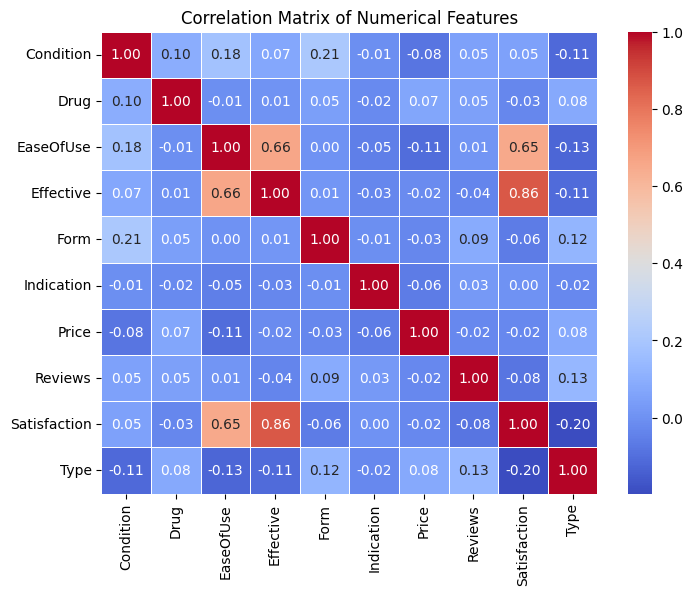

In [38]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

What it shows: This heatmap shows the correlation between all the numerical variables in the dataset (e.g., Price, EaseOfUse, Satisfaction).
Insights: Strong positive or negative correlations indicate how closely two variables are related. For example, a high correlation between EaseOfUse and Satisfaction might suggest that drugs that are easier to use tend to have higher satisfaction ratings.

##### Boxplot for Condition vs. Price

In [39]:
fig = px.box(df, x='Condition', y='Price', title='Price Distribution Across Conditions',
             labels={'Condition': 'Condition', 'Price': 'Price'})

# Show the plot
fig.show()


What it shows: This plot shows the distribution of Price across different Condition categories.
Insights: It highlights the spread, median, and outliers of drug prices for each medical condition, helping to compare the cost of treatment across conditions.

##### Violin Plot for Satisfaction vs. Form

In [40]:
fig = px.violin(df, x='Form', y='Satisfaction', box=True, points="all", 
                title="Satisfaction Distribution by Form", labels={'Form': 'Form', 'Satisfaction': 'Satisfaction'})

# Show the plot
fig.show()

What it shows: This plot shows the distribution of Satisfaction scores for different Form categories (e.g., cream, capsule).
Insights: It reveals how satisfaction varies within each drug form, indicating whether certain forms tend to have higher or lower satisfaction scores, and it can highlight the distribution's spread and any outliers.

##### PairPlot - visualizing relationship between multiple numerical variables

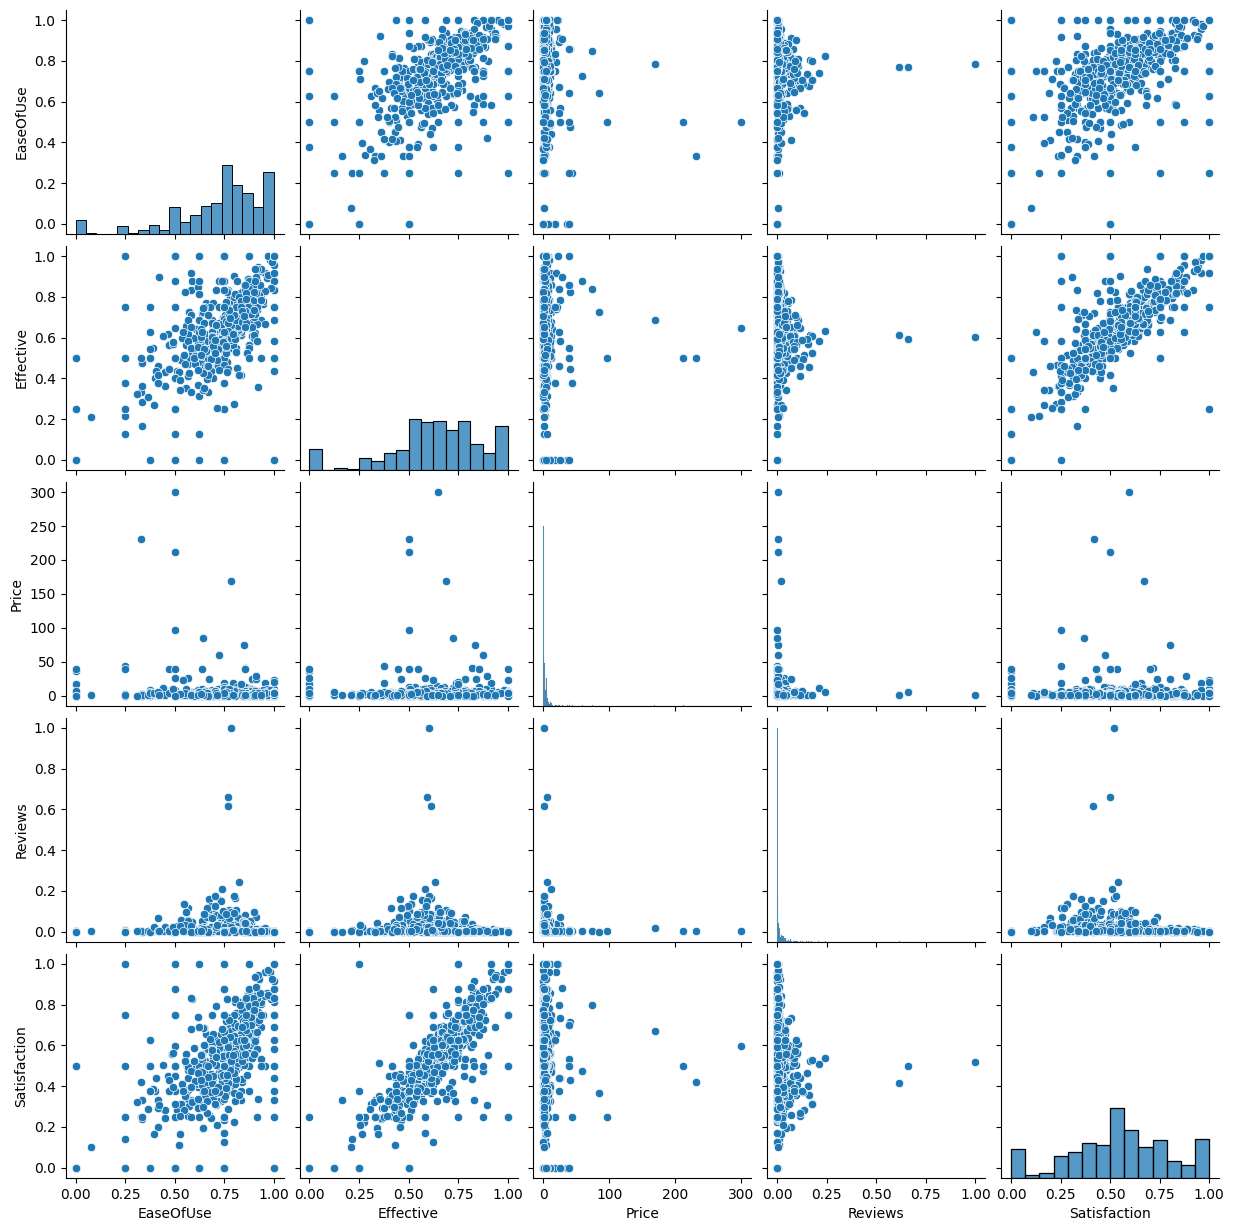

In [41]:
sns.pairplot(df[num_cols])
plt.show()

# Multivariate Analysis

##### Heatmap for Categorical vs Numerical Variables:

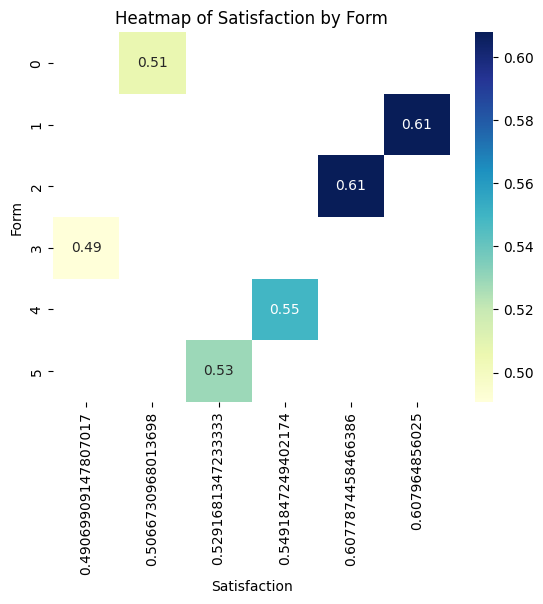

In [42]:
# Group by 'Form' and calculate the average Satisfaction
heatmap_data = df.groupby('Form')['Satisfaction'].mean().reset_index()

# Pivot the data to make 'Form' the index and 'Satisfaction' the columns
heatmap_data_pivot = heatmap_data.pivot(index='Form', columns='Satisfaction', values='Satisfaction')

# Create the heatmap
sns.heatmap(heatmap_data_pivot, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Satisfaction by Form")
plt.show()


##### 3D Scatter Plot

In [43]:
fig = px.scatter_3d(df, x='Price', y='Satisfaction', z='EaseOfUse', 
                    title='Price, Satisfaction, and EaseOfUse 3D Scatter Plot')
fig.show()

##### Heatmap of correlations

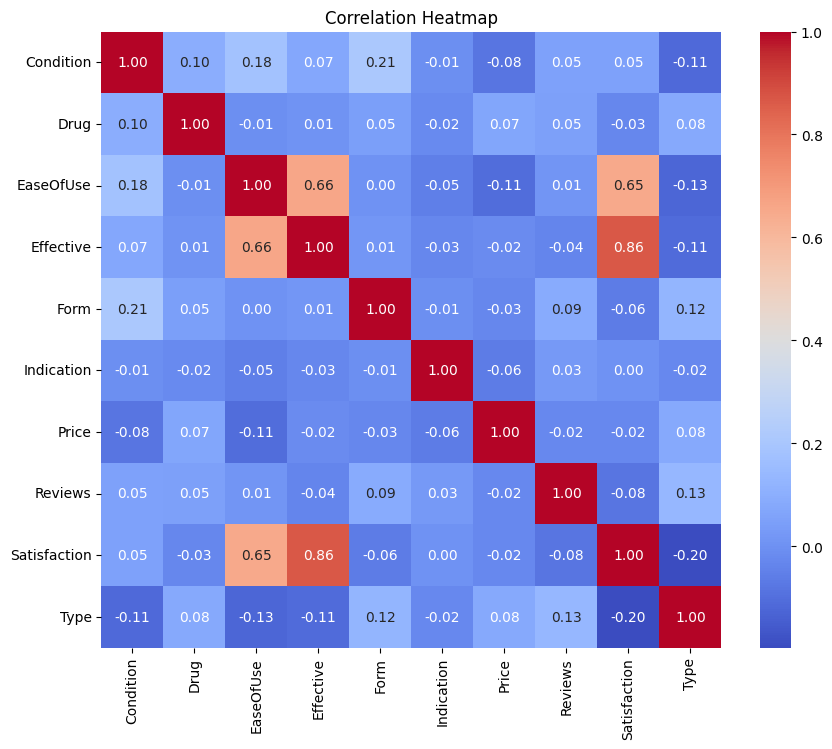

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()